## 범주형 데이터

In [ ]:
# 데이터 가져오기
install.packages("caret")
library(caret)
mydata = read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice



In [ ]:
# 변수 factor화
mydata$admit = as.factor(mydata$admit)
mydata$rank = as.factor(mydata$rank)

In [ ]:
# nnet 성능 향상을 위한 데이터 정규화
nnet.data = data.frame(mydata[, c("admit", "rank")], scale(mydata[, c("gre", "gpa")]))
summary(nnet.data)

 admit   rank         gre                gpa         
 0:273   1: 61   Min.   :-3.18309   Min.   :-2.9690  
 1:127   2:151   1st Qu.:-0.58606   1st Qu.:-0.6829  
         3:121   Median :-0.06666   Median : 0.0134  
         4: 67   Mean   : 0.00000   Mean   : 0.0000  
                 3rd Qu.: 0.62588   3rd Qu.: 0.7360  
                 Max.   : 1.83783   Max.   : 1.6031  

In [ ]:
# 데이터 분할
set.seed(1234)
nnet.ind = createDataPartition(y = nnet.data$admit, p = 0.75, list = FALSE)
nnet.training = nnet.data[nnet.ind, ]
nnet.val = nnet.data[-nnet.ind, ]

In [ ]:
# nnet 적합
install.packages("nnet")
library(nnet)
set.seed(123)
nnet.fit2 = nnet(admit ~ ., data = nnet.training, size = 2)
set.seed(123)
nnet.fit4 = nnet(admit ~ ., data = nnet.training, size = 4)
set.seed(123)
nnet.fit6 = nnet(admit ~ ., data = nnet.training, size = 6)
set.seed(123)
nnet.fit10 = nnet(admit ~ ., data = nnet.training, size = 10)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# weights:  15
initial  value 210.018653 
iter  10 value 175.397942
iter  20 value 171.053402
iter  30 value 168.518995
iter  40 value 167.200021
iter  50 value 166.873029
iter  60 value 166.764317
iter  70 value 165.601306
iter  80 value 165.546247
iter  90 value 165.238674
iter 100 value 163.625964
final  value 163.625964 
stopped after 100 iterations
# weights:  29
initial  value 230.332600 
iter  10 value 173.537505
iter  20 value 168.777555
iter  30 value 164.363132
iter  40 value 155.936356
iter  50 value 151.684751
iter  60 value 150.772039
iter  70 value 150.682361
iter  80 value 150.514777
iter  90 value 150.480627
final  value 150.480618 
converged
# weights:  43
initial  value 189.934460 
iter  10 value 171.730269
iter  20 value 157.400401
iter  30 value 143.535303
iter  40 value 136.362911
iter  50 value 127.997684
iter  60 value 124.672664
iter  70 value 123.227137
iter  80 value 123.152600
final  value 123.152516 
converged
# weights:  71
initial  value 268.350906 
iter  

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’


Loading required package: usethis

ℹ Sourcing gist "5086859"
ℹ SHA-1 hash of file is "27588c1df9bf8f66f32acc09b34a6c31e32cbff9"
Loading required package: scales



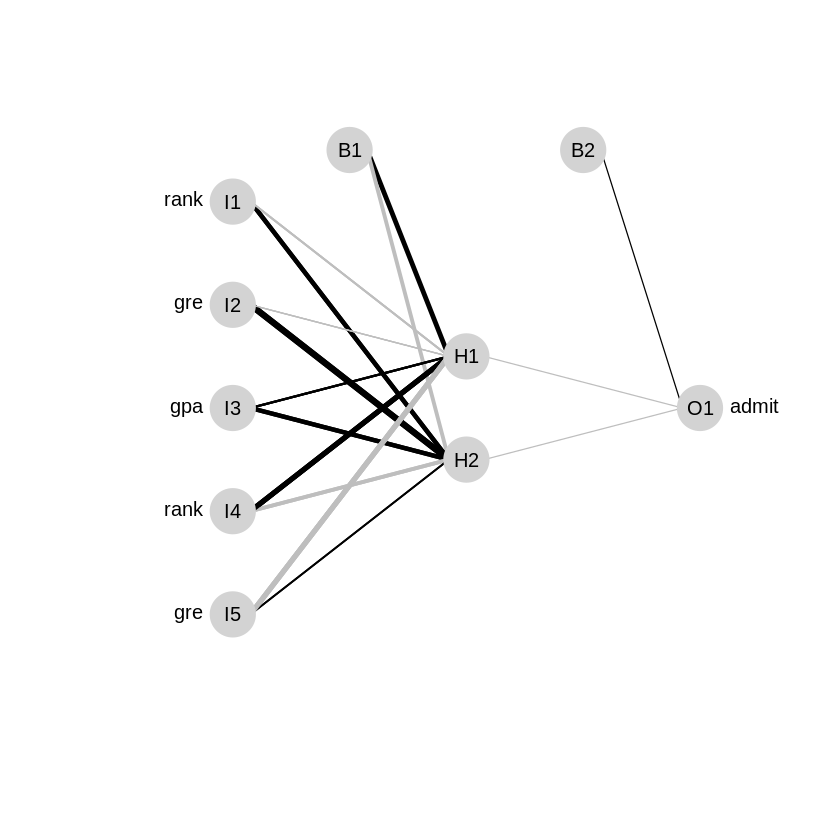

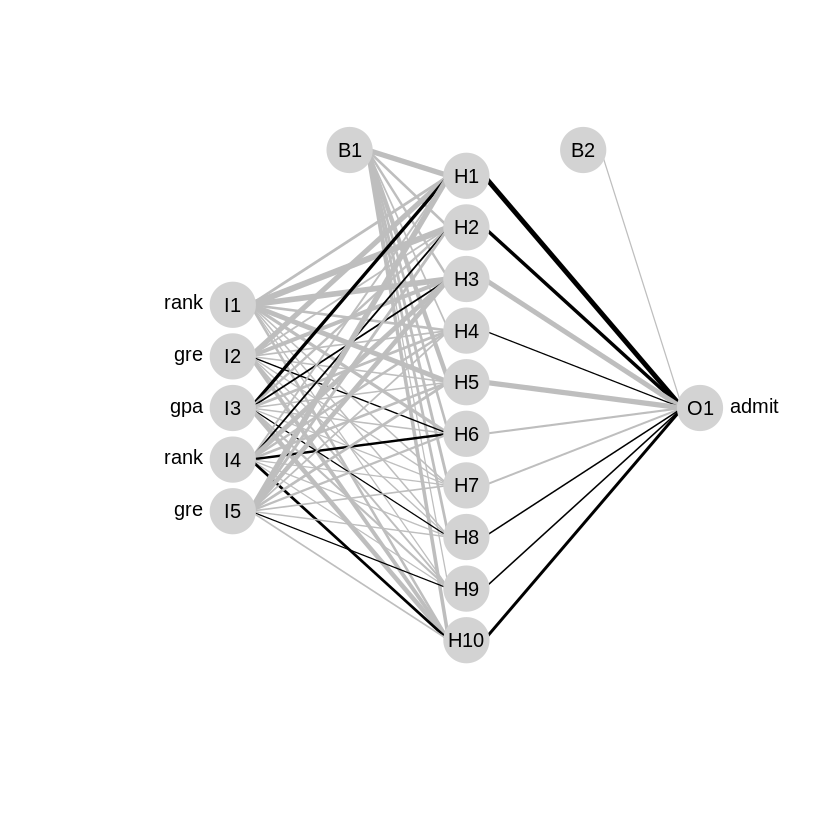

In [ ]:
# nnet 적합 그래프
install.packages("devtools")
library(devtools)
source_gist("5086859")
plot.nnet(nnet.fit2)
plot.nnet(nnet.fit10)

+ weight 선의 굵기로 상대적 영향력 비교 가능

In [ ]:
# ANN 적합 모형을 통한 예측
nnet.pred2 = as.factor(predict(nnet.fit2, newdata = nnet.val, type = "class"))
nnet.pred4 = as.factor(predict(nnet.fit4, newdata = nnet.val, type = "class"))
nnet.pred6 = as.factor(predict(nnet.fit6, newdata = nnet.val, type = "class"))
nnet.pred10 = as.factor(predict(nnet.fit10, newdata = nnet.val, type = "class"))

In [ ]:
confusionMatrix(nnet.val$admit, nnet.pred2)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 65  3
         1 29  2
                                          
               Accuracy : 0.6768          
                 95% CI : (0.5753, 0.7673)
    No Information Rate : 0.9495          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0264          
                                          
 Mcnemar's Test P-Value : 9.897e-06       
                                          
            Sensitivity : 0.69149         
            Specificity : 0.40000         
         Pos Pred Value : 0.95588         
         Neg Pred Value : 0.06452         
             Prevalence : 0.94949         
         Detection Rate : 0.65657         
   Detection Prevalence : 0.68687         
      Balanced Accuracy : 0.54574         
                                          
       'Positive' Class : 0               
                                    

In [ ]:
confusionMatrix(nnet.val$admit, nnet.pred4)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 62  6
         1 25  6
                                          
               Accuracy : 0.6869          
                 95% CI : (0.5859, 0.7764)
    No Information Rate : 0.8788          
    P-Value [Acc > NIR] : 1.000000        
                                          
                  Kappa : 0.1264          
                                          
 Mcnemar's Test P-Value : 0.001225        
                                          
            Sensitivity : 0.7126          
            Specificity : 0.5000          
         Pos Pred Value : 0.9118          
         Neg Pred Value : 0.1935          
             Prevalence : 0.8788          
         Detection Rate : 0.6263          
   Detection Prevalence : 0.6869          
      Balanced Accuracy : 0.6063          
                                          
       'Positive' Class : 0               
                                    

In [ ]:
confusionMatrix(nnet.val$admit, nnet.pred6)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 58 10
         1 23  8
                                          
               Accuracy : 0.6667          
                 95% CI : (0.5648, 0.7582)
    No Information Rate : 0.8182          
    P-Value [Acc > NIR] : 0.99991         
                                          
                  Kappa : 0.1253          
                                          
 Mcnemar's Test P-Value : 0.03671         
                                          
            Sensitivity : 0.7160          
            Specificity : 0.4444          
         Pos Pred Value : 0.8529          
         Neg Pred Value : 0.2581          
             Prevalence : 0.8182          
         Detection Rate : 0.5859          
   Detection Prevalence : 0.6869          
      Balanced Accuracy : 0.5802          
                                          
       'Positive' Class : 0               
                                    

In [ ]:
confusionMatrix(nnet.val$admit, nnet.pred10)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 57 11
         1 27  4
                                         
               Accuracy : 0.6162         
                 95% CI : (0.513, 0.7122)
    No Information Rate : 0.8485         
    P-Value [Acc > NIR] : 1.00000        
                                         
                  Kappa : -0.0381        
                                         
 Mcnemar's Test P-Value : 0.01496        
                                         
            Sensitivity : 0.6786         
            Specificity : 0.2667         
         Pos Pred Value : 0.8382         
         Neg Pred Value : 0.1290         
             Prevalence : 0.8485         
         Detection Rate : 0.5758         
   Detection Prevalence : 0.6869         
      Balanced Accuracy : 0.4726         
                                         
       'Positive' Class : 0              
                                         

## 연속형 데이터

In [ ]:
# 데이터 가져오기
reg.data = read.csv("https://stats.idre.ucla.edu/wp-content/uploads/2019/02/elemapi2v2.csv")

In [ ]:
# nnet 성능 향상을 위한 정규화
normalize = function(x){
  return ((x - min(x)) / (max(x) - min(x)))
}
scale.data = data.frame(lapply(reg.data, normalize))

In [ ]:
# 데이터 분할
scale.ind = createDataPartition(y = scale.data$api00, p = 0.75, list = FALSE)
scale.training = scale.data[scale.ind, ]
scale.val = scale.data[-scale.ind, ]

In [ ]:
# nnet 적합
library(nnet)
set.seed(123)
nnet.fit2 = nnet(api00 ~ enroll + meals + full, data = scale.training, size = 2)
set.seed(123)
nnet.fit4 = nnet(api00 ~ enroll + meals + full, data = scale.training, size = 4)
set.seed(123)
nnet.fit6 = nnet(api00 ~ enroll + meals + full, data = scale.training, size = 6)
set.seed(123)
nnet.fit10 = nnet(api00 ~ enroll + meals + full, data = scale.training, size = 10)

# weights:  11
initial  value 23.457136 
iter  10 value 4.388575
iter  20 value 3.170274
iter  30 value 3.070324
iter  40 value 3.043420
iter  50 value 3.037284
iter  60 value 3.030981
iter  70 value 3.026730
iter  80 value 3.021552
iter  90 value 3.018390
iter 100 value 3.014656
final  value 3.014656 
stopped after 100 iterations
# weights:  21
initial  value 19.324982 
iter  10 value 3.224129
iter  20 value 2.969645
iter  30 value 2.949210
iter  40 value 2.921662
iter  50 value 2.910005
iter  60 value 2.901227
iter  70 value 2.887505
iter  80 value 2.882561
iter  90 value 2.877066
iter 100 value 2.873534
final  value 2.873534 
stopped after 100 iterations
# weights:  31
initial  value 27.274543 
iter  10 value 4.793319
iter  20 value 2.975826
iter  30 value 2.939876
iter  40 value 2.928706
iter  50 value 2.906611
iter  60 value 2.898552
iter  70 value 2.896641
iter  80 value 2.878070
iter  90 value 2.866134
iter 100 value 2.851233
final  value 2.851233 
stopped after 100 iterations
#

ℹ Sourcing gist "5086859"
ℹ SHA-1 hash of file is "27588c1df9bf8f66f32acc09b34a6c31e32cbff9"


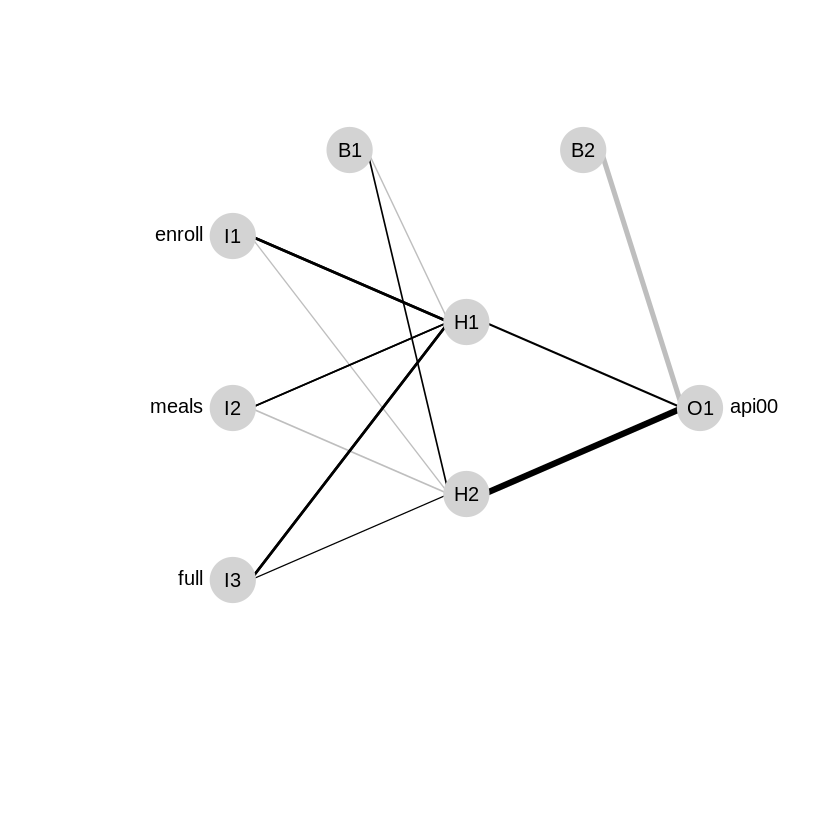

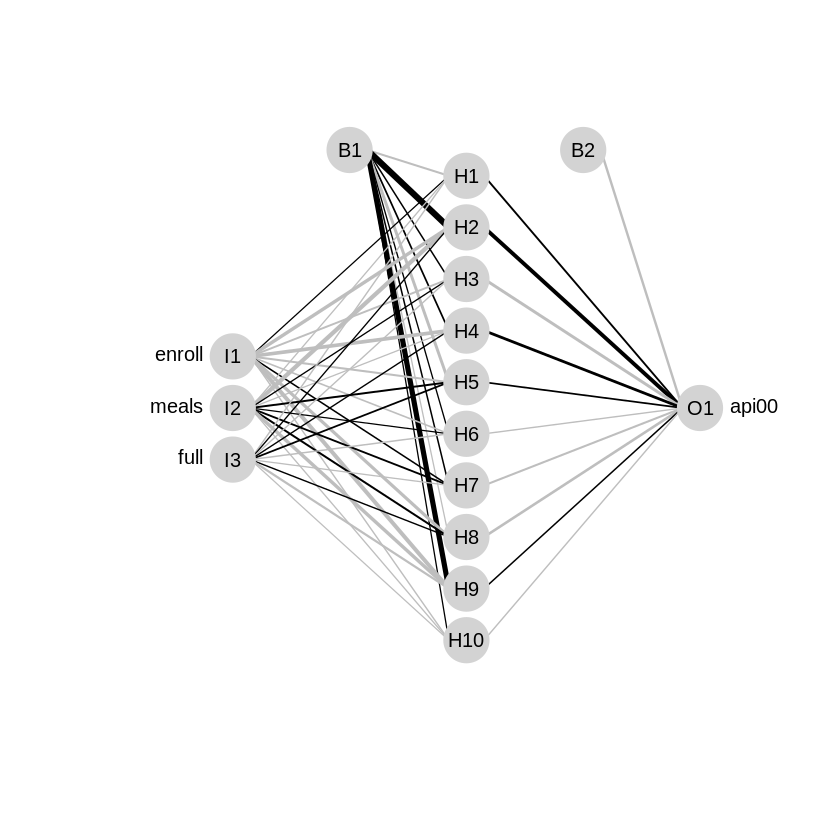

In [ ]:
# nnet 적합 그래프 생성
library(devtools)
source_gist("5086859")
plot.nnet(nnet.fit2)
plot.nnet(nnet.fit10)

In [ ]:
# 예측 및 비교를 위한 역변환
nnet.pred2 = predict(nnet.fit2, newdata = scale.val) * (max(reg.data$api00) - min(reg.data$api00)) + min(reg.data$api00)
nnet.pred4 = predict(nnet.fit4, newdata = scale.val) * (max(reg.data$api00) - min(reg.data$api00)) + min(reg.data$api00)
nnet.pred6 = predict(nnet.fit6, newdata = scale.val) * (max(reg.data$api00) - min(reg.data$api00)) + min(reg.data$api00)
nnet.pred10 = predict(nnet.fit10, newdata = scale.val) * (max(reg.data$api00) - min(reg.data$api00)) + min(reg.data$api00)
actual = scale.val$api00 * (max(reg.data$api00) - min(reg.data$api00)) + min(reg.data$api00)

In [ ]:
# 지표를 통해 결과 비교
install.packages("MLmetrics")
install.packages("forecast")
library(MLmetrics)
library(forecast)
accuracy(ts(nnet.pred2), actual)
accuracy(ts(nnet.pred4), actual)
accuracy(ts(nnet.pred6), actual)
accuracy(ts(nnet.pred10), actual)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’



Attaching package: ‘MLmetrics’


The following objects are masked from ‘package:caret’:

    MAE, RMSE


The following object is masked from ‘package:base’:

    Recall


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



,ME,RMSE,MAE,MPE,MAPE
Test set,-8.937288,64.15129,51.13895,-2.379619,8.458007


,ME,RMSE,MAE,MPE,MAPE
Test set,-10.44593,64.17545,49.76778,-2.565721,8.357937


,ME,RMSE,MAE,MPE,MAPE
Test set,-10.35115,66.06004,51.19944,-2.534254,8.582855


,ME,RMSE,MAE,MPE,MAPE
Test set,-9.185456,63.09709,49.94589,-2.38772,8.312481
